
# Project: The "No-show appointments" dataset investigation
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This notebook presents the investigation process on the "No-show appointments" dataset. briefly, the dataset contains 110527 confirmed medical appointments in Brazil and it shows some information about each patient like (age, diabetes status, Alcoholism status, gender, appointment day, and so on...). In addition, it tells us whether the patient missed the appointment or not. Here, I used python to analyze the dataset with pandas, matplotlib and numpy packages. 

There are several questions I tried to answer during the analysis:
  - The proportion of missed/attended appointments over the total appointments number
  - How did having the scholarship (Brasilian welfare program) affect the attendance ratio?
  - How did receiving reminder SMS affect the attendance ratio? 
  - How does age affect the risk of having diabetes?
  - For the neighbourhoods with 100 or more appointments registered, what is/are the neighborhood(s) with the highest/lowest appointment missing proportion? 
  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sn


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id='wrangling'></a>
## Data Wrangling


### Loading data 

In [2]:
df = pd.read_csv('appointments.csv') # the file name may change, but its as same as the original one
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Rename the no-show column  

In [3]:
df.rename(columns={'No-show':'NO_SHOW'},inplace=True)
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NO_SHOW
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


### Print quick info about the dataset
As shown, no Null values and all columns dtypes are suitable to deal with 

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  NO_SHOW         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Check for duplicated appointments

In [5]:
print(any(df.duplicated('AppointmentID'))) # No duplicated appointments


False


### Print general statistics about the dataset
We note that there is/are row(s) with age = -1, which is not realistic 

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Show how many rows with -1 age value and show the row(s)

In [7]:
print('Number of rows with (-1) age value = ' + str(df[df['Age'] == -1].count()[0]))
df[df['Age'] == -1]

Number of rows with (-1) age value = 1


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NO_SHOW
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


### Drop the row with the invalid age value

In [8]:
df = df[df['Age'] != -1]
df[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NO_SHOW


<a id='eda'></a>
## Exploratory Data Analysis


###  Q1: What is the proportion of missed/attended appointments over the total number?

#### Find the total number of appointments, missed appointments and attended appointments

In [9]:
df.NO_SHOW.value_counts()[0]
print(f'Total number of appointments = {df.shape[0]}')
print(f'Total number of attended appointments = {df.NO_SHOW.value_counts()[0]}')
print(f'Total number of missed appointments = {df.NO_SHOW.value_counts()[1]}')

Total number of appointments = 110526
Total number of attended appointments = 88207
Total number of missed appointments = 22319


#### Plot the proportion of missed and attended appointments on the pie chart

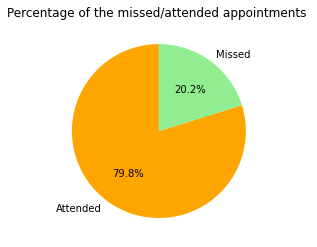

In [10]:
plt.pie([df.NO_SHOW.value_counts()[0]/df.shape[0]*100, df.NO_SHOW.value_counts()[1]/df.shape[0]*100], 
        colors=['orange','lightgreen'], labels=['Attended','Missed'],autopct='%1.1f%%' ,startangle=90);

plt.title('Percentage of the missed/attended appointments ');

### Q1 observations:
 - There are 22319 appointments out of 110526 are missed (labeled with NO_SHOW = 1), which is equal to 20.2% 
 - There are 88207 appointments out of 110526 are attended (labeled with NO_SHOW = 0), which is equal to 79.2% 

### Q2: How did having the scholarship (Brasilian welfare program) affect the attendance ratio?

#### To answer this question, we need to group by the NO_SHOW column and count the values according to having a scholarship

In [11]:
abs_group = df.groupby('NO_SHOW')
abs_group['Scholarship'].value_counts()

NO_SHOW  Scholarship
No       0              79924
         1               8283
Yes      0              19741
         1               2578
Name: Scholarship, dtype: int64

#### After that, we need to find the following ratios:
* Number of appointments attended and recorded scholarship = 1, over the total number of appointments with recorded scholarship = 1
* Number of appointments attended and recorded scholarship = 0, over the total number of appointments with recorded scholarship = 0

****Note: scholarship = 0 means the patient has not a scholarship (for Brasilian welfare program)***

In [12]:
with_sch_rat = abs_group['Scholarship'].value_counts()['No',1]/(abs_group['Scholarship'].value_counts()['No',1]+abs_group['Scholarship'].value_counts()['Yes',1])*100
without_sch_rat = abs_group['Scholarship'].value_counts()['No',0]/(abs_group['Scholarship'].value_counts()['No',0]+abs_group['Scholarship'].value_counts()['Yes',0])*100

#### Bar plot function definition 


In [13]:
def plot2Bars(label1,x1,label2,x2,width,color1, color2,title,ylabel):
  plt.bar(label1, x1,width= width,color= color1, zorder=2)
  plt.bar(label2, x2, width=width,color= color2, zorder=2)
  plt.title(title);
  plt.ylabel(ylabel);
  plt.grid(axis='y', zorder=0);

#### Plot the results on the bar chart

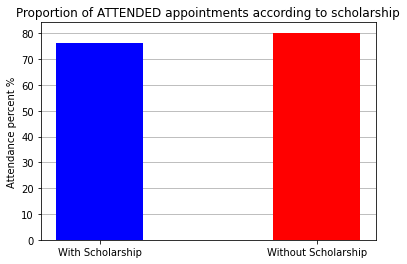

In [14]:
plot2Bars(label1='With Scholarship',x1=with_sch_rat,label2='Without Scholarship',x2=without_sch_rat,width=0.4,color1='b',
          color2='r',title='Proportion of ATTENDED appointments according to scholarship', ylabel='Attendance percent %')

### Q2 observations:
- The attendance proportion for appointments with recorded scholarship = 0 is about 80% of the total appointments with scholarship = 0
- The attendance proportion for appointments with recorded scholarship = 1 is about 76% of the total appointments with scholarship = 1

### Q3: How did receiving reminder SMS affect the attendance ratio?

#### First, we need to group by the NO_SHOW column and count the values according to receiving SMS

In [15]:
abs_group = df.groupby('NO_SHOW')
abs_group['SMS_received'].value_counts()

NO_SHOW  SMS_received
No       0               62509
         1               25698
Yes      0               12535
         1                9784
Name: SMS_received, dtype: int64

#### Then we need to find the following ratios:
* Number of appointments attended and recorded SMS_received = 1, over the total number of appointments with recorded SMS_received = 1
* Number of appointments attended and recorded SMS_received = 0, over the total number of appointments with recorded SMS_received = 0

****Note: SMS_received = 0 means the patient did not receive reminder message and vice versa***

In [16]:
with_sms_rat = abs_group['SMS_received'].value_counts()['No',1]/(abs_group['SMS_received'].value_counts()['No',1]+abs_group['SMS_received'].value_counts()['Yes',1])*100
without_sms_rat = abs_group['SMS_received'].value_counts()['No',0]/(abs_group['SMS_received'].value_counts()['No',0]+abs_group['SMS_received'].value_counts()['Yes',0])*100

#### Plot the results on the bar chart

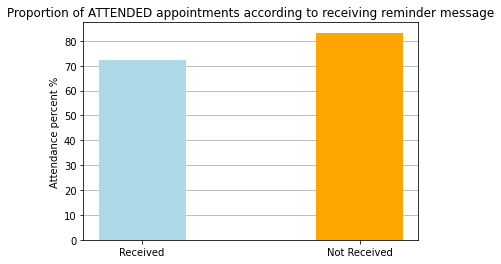

In [17]:
plot2Bars(label1='Received',x1=with_sms_rat,label2='Not Received',x2=without_sms_rat,width=0.4,color1='lightblue',
          color2='orange',title='Proportion of ATTENDED appointments according to receiving reminder message', ylabel='Attendance percent %')

### Q3 observations:
- The attendance proportion for appointments with NO received SMS is about 83% of the total appointments that did not receive SMS
- The attendance proportion for appointments with received SMS is about 72% of the total appointments that received SMS



### Q4: How does age affect the risk of having diabetes?

#### To start, we will create a new column that contains the age levels ('Infants','Children','Adults','Elderly')  as follows:
Infants: 0 - 1 years old

Children: 2 - 17 years old

Adults: 18 - 64 years old

Elderly: 65 - 120 years old

In [18]:
labels = ['Infants','Children','Adults','Elderly']
intervals = [-1,1,17,64,120]# -1  is not included, starting from 0 years old
df['Age_interval'] = pd.cut(x=df['Age'],bins=intervals,labels=labels)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   PatientId       110526 non-null  float64 
 1   AppointmentID   110526 non-null  int64   
 2   Gender          110526 non-null  object  
 3   ScheduledDay    110526 non-null  object  
 4   AppointmentDay  110526 non-null  object  
 5   Age             110526 non-null  int64   
 6   Neighbourhood   110526 non-null  object  
 7   Scholarship     110526 non-null  int64   
 8   Hipertension    110526 non-null  int64   
 9   Diabetes        110526 non-null  int64   
 10  Alcoholism      110526 non-null  int64   
 11  Handcap         110526 non-null  int64   
 12  SMS_received    110526 non-null  int64   
 13  NO_SHOW         110526 non-null  object  
 14  Age_interval    110526 non-null  category
dtypes: category(1), float64(1), int64(8), object(5)
memory usage: 12.8+ MB


#### Creating new dataset that contains each 'PatientId' apeared only one time
****Dropping the duplicated 'PatientId' is important because diabetes is related to the patient not to the appointment, so we should keep the patient only one time*** 

In [19]:
print(df.duplicated('PatientId').sum()) #number of duplicated patients in the dataset
df_unique = df.copy()
df_unique.drop_duplicates(subset=('PatientId'),inplace=True)
df_unique.info()

48228
<class 'pandas.core.frame.DataFrame'>
Int64Index: 62298 entries, 0 to 110524
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PatientId       62298 non-null  float64 
 1   AppointmentID   62298 non-null  int64   
 2   Gender          62298 non-null  object  
 3   ScheduledDay    62298 non-null  object  
 4   AppointmentDay  62298 non-null  object  
 5   Age             62298 non-null  int64   
 6   Neighbourhood   62298 non-null  object  
 7   Scholarship     62298 non-null  int64   
 8   Hipertension    62298 non-null  int64   
 9   Diabetes        62298 non-null  int64   
 10  Alcoholism      62298 non-null  int64   
 11  Handcap         62298 non-null  int64   
 12  SMS_received    62298 non-null  int64   
 13  NO_SHOW         62298 non-null  object  
 14  Age_interval    62298 non-null  category
dtypes: category(1), float64(1), int64(8), object(5)
memory usage: 7.2+ MB


#### Grouping by the 'Age_interval' column, and count the diabetics and non-diabetics patients for each level

In [20]:
age_group = df_unique.groupby('Age_interval')
age_dia_group = age_group['Diabetes'].value_counts()
age_dia_group

Age_interval  Diabetes
Infants       0            3515
              1               1
Children      0           12723
              1              22
Adults        0           35173
              1            2508
Elderly       0            6471
              1            1885
Name: Diabetes, dtype: int64

#### Finding the proportion of diabetic infants, children, adults, and elderlies over the number of total people at the same level

In [21]:
def createAgeLevels(levels):
  levels_percent_arr = np.array([])
  for level in levels:
     levels_percent_arr = np.append(levels_percent_arr,np.round(age_dia_group[level,1]/age_dia_group[level].sum()*100,2))
  return levels_percent_arr   
    

In [22]:
levels = ['Infants','Children','Adults','Elderly']
levels_percent_arr = createAgeLevels(levels)

percent_infants = levels_percent_arr[0]
percent_children = levels_percent_arr[1]
percent_adults = levels_percent_arr[2]
percent_edlerly = levels_percent_arr[3]


print('Percentage of Infants with diabetes over total Infants: ' + str(percent_infants)  + '%\n')
print('Percentage of Children with diabetes over total Children: ' + str(percent_children)  + '%\n')
print('Percentage of Adults with diabetes over total Adults: ' + str(percent_adults)  + '%\n')
print('Percentage of Elderlies with diabetes over total Elderlies: ' + str(percent_edlerly)  + '%\n')



Percentage of Infants with diabetes over total Infants: 0.03%

Percentage of Children with diabetes over total Children: 0.17%

Percentage of Adults with diabetes over total Adults: 6.66%

Percentage of Elderlies with diabetes over total Elderlies: 22.56%



#### Plot the result on the bar chart

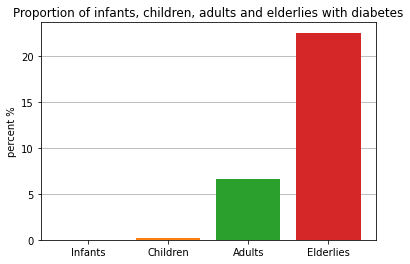

In [23]:
plt.bar('Infants',percent_infants, zorder=2)
plt.bar('Children',percent_children, zorder=2)
plt.bar('Adults',percent_adults, zorder=2)
plt.bar('Elderlies',percent_edlerly, zorder=2)

plt.title('Proportion of infants, children, adults and elderlies with diabetes')
plt.ylabel('percent %')
plt.grid(axis='y', zorder=0)

### Q4 observations:
- The elderlies level recorded the highest proportion of diabetics
- The infants level recorded the highest proportion of diabetics
- The elderlies have a high risk to have diabetes and they are 16% more likely to develop diabetes than adults 


### Q5: For the neighborhoods with 100 or more appointments registered, what is/are the neighborhood(s) with the highest/lowest appointments missing proportion?

#### First, we need to group by the 'Neighbourhood' column, then count each neighborhood's records and choose ones with more than or equal to 100

In [24]:
df_neigh = df.groupby('Neighbourhood').count()
df_neigh = df_neigh[df_neigh.Age >=100]


#### Create a numpy array contains the neighborhoods' names

In [25]:
neighbourhoods_names = df_neigh.index

#### Count the number of missing and attendance times for each neighborhood 
****abs_group is the original dataset (df) grouped by the 'NO_SHOW' column' which created in Q1 section***

In [26]:
neighbourhoods_count = abs_group['Neighbourhood'].value_counts()
neighbourhoods_count

NO_SHOW  Neighbourhood              
No       JARDIM CAMBURI                 6252
         MARIA ORTIZ                    4586
         RESISTÊNCIA                    3525
         JARDIM DA PENHA                3246
         SANTA MARTHA                   2635
                                        ... 
Yes      PONTAL DE CAMBURI                12
         ILHA DO BOI                       3
         ILHA DO FRADE                     2
         ILHAS OCEÂNICAS DE TRINDADE       2
         AEROPORTO                         1
Name: Neighbourhood, Length: 160, dtype: int64

#### Finding the number of missing times over the total appointments recorded for the neighborhood and saving it into a numpy array

In [27]:
missed_percentages_arr = np.array([])

for name in neighbourhoods_names:
           missing_ratio = neighbourhoods_count['Yes',name]/df[df['Neighbourhood'] == name].count()[0]*100
           missed_percentages_arr =  np.append(missed_percentages_arr,missing_ratio)
          

#### Printing the number of neighborhoods included in the calculation (has more than or equal to 100 appointments), the neighborhood with the highest missing proportion, and the neighborhood with the lowest missing proportion


In [28]:
print(f'Number of Neighbourhoods included: {missed_percentages_arr.size} ')
print(f'The Neighborhood with the highest missing percentage: "{neighbourhoods_names[np.argmax(missed_percentages_arr)]}" ')
print(f'The Neighborhood with the lowest missing percentage: "{neighbourhoods_names[np.argmin(missed_percentages_arr)]}" ')

Number of Neighbourhoods included: 74 
The Neighborhood with the highest missing percentage: "SANTOS DUMONT" 
The Neighborhood with the lowest missing percentage: "MÁRIO CYPRESTE" 


#### Plot the distribution of neighborhoods no-show percentages

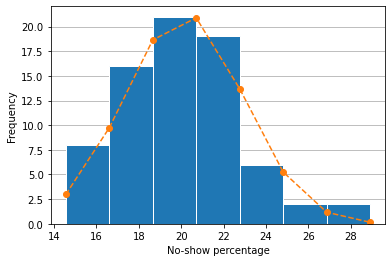

In [29]:
plt.grid(axis='y')
n, bins, patches = plt.hist(missed_percentages_arr,bins=7,edgecolor='white', zorder=2)

#plot the probability density function as dashed line (Bonus+)
from scipy.stats import norm 
mean = missed_percentages_arr.mean()
std = missed_percentages_arr.std()
line = norm.pdf(bins,mean,std)

plt.plot(bins,line*150,'o--')
plt.ylabel('Frequency')
plt.xlabel('No-show percentage');

### Q5 observations:¶
- The highest no-show percentage appeared with "SANTOS DUMONT" neighborhood
- The lowest no-show percentage appeared with "MÁRIO CYPRESTE" neighborhood
- The number of neighborhoods with more than or equal to 100 appointments is 75
- The neighborhoods' no-show percentages are almost normally distributed



## Presenting the correlation between the features using the heatmap 

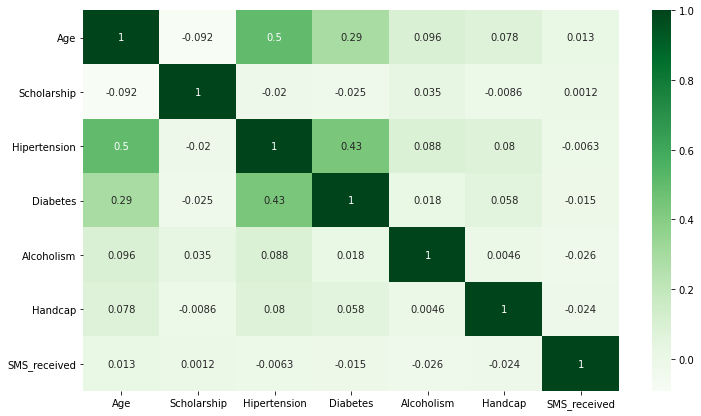

In [30]:
df_corr = df[['Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
              'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']]

corr_matrix = df_corr.corr()

plt.figure(figsize=(12, 7))
sn.heatmap(corr_matrix, annot=True,cmap="Greens")
plt.show();

<a id='conclusions'></a>
## Conclusions

To sum up, the investigation of this dataset resulted in the following findings (only imply on the population described by the dataset):
- The no-show (missing) proportion is 20.2%.
- The elderly (65+ yrs) are more likely to have diabetes than infants, adults, and children.
- Whether the patient joined the Brasilian welfare program or not, no assumption can be made about his/her no-show possibility.
- Sending reminder messages to patients does not seem to be an active solution for no-show cases.
- Each neighborhood has its no-show possibility, with range the [14.5, 28.9] % approximately.

Besides, there was some difficulty and limitations due to the dataset nature like:
- Most of the features are on the discrete form, with only 1 or 0 values.
- During wrangling, there was a patient with age = -1, which is unacceptable.
- Some additional features are good to report, such as the annual income and marital status.

However, the dataset is tidy and well-cleaned and it has not null values.  


## Resources and helping sites:

 - https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
 - https://stackoverflow.com/
 - https://pandas.pydata.org/pandas-docs/stable/index.html
 - https://matplotlib.org/
 - https://www.kite.com/
